# Smoking is associated with changes in the presence of miRNA isoforms and Small RNA Fragments in the Exosomes of Lung Cancer Patients

Step 1: Process through QuickMiRSeq sample by sample. 
(Initalize a bash loop that essentially runs the pipeline and renames the file to the sample)

Then place this script in the proper directory hierarchy. 

In [34]:
import os

dir_es = os.listdir()

for you in dir_es:
    if os.path.isdir(you):
        current = os.listdir(you)
        for item in current:
            if os.path.isdir(you + "/" + item):
                inner = os.listdir(you + "/" + item)
                inner = inner[0]

                if os.path.isdir(you + "/" + item + "/" + inner):
                    inner2 = os.listdir(you + "/" + item + "/" + inner)
                    
                    for item2 in inner2:

                        full_path = you + "/" + item + "/" + inner + "/" + item2
                        inner3 = os.listdir(full_path)

                        full_path_sample = full_path + "/" + inner3[0]

                        name_ident = inner3[0].split(sep = "_")

                        new_file = "_".join(name_ident[0:2]) + ".fastq.gz"

                        os.system("cat " + full_path_sample + " >> " + new_file)

In [6]:
import os

with open("samples.txt", "w") as new:
    for f in os.listdir("processed/"):
        if "._" in f:
            print(f)
        else:
            f_new = f.split(sep =".")
            f_name = f_new[0]
            new.write(f_name + "\n")
    

._Masaki-sample1_S1.fastq
._Masaki-sample2_S2.fastq
._Masaki-sample3_S3.fastq
._Masaki-sample4_S4.fastq
._Masaki-sample5_S5.fastq
._Masaki-sample6_S6.fastq
._Masaki-sample7_S7.fastq
._Masaki-sample8_S8.fastq
._Masaki-sample9_S9.fastq
._Masaki-sample10_S10.fastq
._Masaki-sample11_S11.fastq
._Masaki-sample12_S12.fastq
._Masaki-sample13_S13.fastq
._Masaki-sample14_S14.fastq
._Masaki-sample15_S15.fastq
._Masaki-sample16_S16.fastq
._Masaki-sample17_S17.fastq
._Masaki-sample18_S18.fastq
._Masaki-sample19_S19.fastq
._Masaki-sample20_S20.fastq
._Masaki-sample21_S21.fastq
._Masaki-sample22_S22.fastq
._Masaki-sample23_S23.fastq
._Masaki-sample24_S24.fastq
._Masaki-sample25_S25.fastq
._Masaki-sample26_S26.fastq
._Masaki-sample27_S27.fastq
._Masaki-sample28_S28.fastq
._Masaki-sample29_S29.fastq
._Masaki-sample30_S30.fastq
._Masaki-sample31_S31.fastq
._Masaki-sample32_S32.fastq
._Masaki-sample33_S33.fastq
._Masaki-sample34_S34.fastq
._Masaki-sample35_S35.fastq
._Masaki-sample36_S36.fastq
._Masaki-s

In [11]:
import re
import pandas as pd



with open("QuickMIRSeq/samples_adapters.txt") as samples:
    i = 0
    
    for sample in samples:
        builder_dict = {}

        samp_name = sample.strip("\n")

        alignment_file = "QuickMIRSeq/" + samp_name + "/alignment/" + samp_name + ".align.txt"

        sample_total = 0

        with open(alignment_file, "r") as align:
            for line in align:
                line = line.strip("\n")

                if ">" in line:
                    split_line = line.split(sep = "  ")

                    total_read = split_line[2].split(sep = " ")

                    total_read = int(total_read[1])
                    sample_total += total_read

                    prefix = split_line[0]

                elif "strand" in line:
                    continue

                elif line == "":
                    continue

                else:
                    clean_line = line.replace(" ", "")
                    clean_line = clean_line.replace("+"," ")
                    
                    split_line = re.split('(\d+)',clean_line)

                    split_line[1] = int(split_line[1])

                    read_name = prefix + "_" + split_line[2]

                    if split_line[1] >= 5:
                        builder_dict.update({read_name:[split_line[1]]})

        if i == 0:
            final_df = pd.DataFrame.from_dict(builder_dict, columns = [sample.strip("\n")], orient="index")

            #final_df[sample.strip("\n")] = final_df[sample.strip("\n")] / sample_total

            i += 1
        else:
            temp_df = pd.DataFrame.from_dict(builder_dict, columns = [sample.strip("\n")], orient="index")

            #temp_df[sample.strip("\n")] = temp_df[sample.strip("\n")] / sample_total

            final_df = pd.concat([final_df, temp_df], axis = 1)

final_df = final_df.fillna(0)
final_df.to_csv("isomir_reads.csv")
                    

In [1]:
import re
import pandas as pd



with open("QuickMIRSeq/samples_adapters.txt") as samples:
    i = 0
    
    for sample in samples:
        builder_dict = {}

        samp_name = sample.strip("\n")

        alignment_file = "QuickMIRSeq/" + samp_name + "/alignment/" + samp_name + ".align.txt"

        sample_total = 0

        with open(alignment_file, "r") as align:
            for line in align:
                line = line.strip("\n")

                if ">" in line:
                    split_line = line.split(sep = "  ")

                    total_read = split_line[2].split(sep = " ")

                    total_read = int(total_read[1])
                    sample_total += total_read

                    prefix = split_line[0]

                elif "strand" in line:
                    continue

                elif line == "":
                    continue

                else:
                    clean_line = line.replace(" ", "")
                    clean_line = clean_line.replace("+"," ")
                    
                    split_line = re.split('(\d+)',clean_line)

                    split_line[1] = int(split_line[1])

                    read_name = prefix + "_" + split_line[2]

                    if split_line[1] >= 5:
                        builder_dict.update({read_name:[split_line[1] / total_read]})

        if i == 0:
            final_df = pd.DataFrame.from_dict(builder_dict, columns = [sample.strip("\n")], orient="index")

            final_df[sample.strip("\n")] = final_df[sample.strip("\n")]

            i += 1
        else:
            temp_df = pd.DataFrame.from_dict(builder_dict, columns = [sample.strip("\n")], orient="index")

            temp_df[sample.strip("\n")] = temp_df[sample.strip("\n")]

            final_df = pd.concat([final_df, temp_df], axis = 1)

final_df = final_df.fillna(0)
final_df.to_csv("isomir_props.csv")

In [13]:
import re
import pandas as pd



with open("QuickMIRSeq/samples.txt") as samples:
    i = 0
    
    for sample in samples:
        builder_dict = {}

        samp_name = sample.strip("\n")

        alignment_file = "QuickMIRSeq/" + samp_name + "/alignment/" + samp_name + ".align.txt"

        sample_total = 0

        with open(alignment_file, "r") as align:
            for line in align:
                line = line.strip("\n")

                if ">" in line:
                    split_line = line.split(sep = "  ")

                    total_read = split_line[2].split(sep = " ")

                    total_read = int(total_read[1])
                    sample_total += total_read

                    prefix = split_line[0]

                elif "strand" in line:
                    continue

                elif line == "":
                    continue

                else:
                    clean_line = line.replace(" ", "")
                    clean_line = clean_line.replace("+"," ")
                    
                    split_line = re.split('(\d+)',clean_line)

                    split_line[1] = int(split_line[1])

                    read_name = prefix + "_" + split_line[2]

                    if split_line[1] >= 5:
                        builder_dict.update({read_name:[1]})

        if i == 0:
            final_df = pd.DataFrame.from_dict(builder_dict, columns = [sample.strip("\n")], orient="index")

            #final_df[sample.strip("\n")] = final_df[sample.strip("\n")] / sample_total

            i += 1
        else:
            temp_df = pd.DataFrame.from_dict(builder_dict, columns = [sample.strip("\n")], orient="index")

            #temp_df[sample.strip("\n")] = temp_df[sample.strip("\n")] / sample_total

            final_df = pd.concat([final_df, temp_df], axis = 1)

final_df = final_df.fillna(0)
final_df.to_csv("isomir_bin.csv")

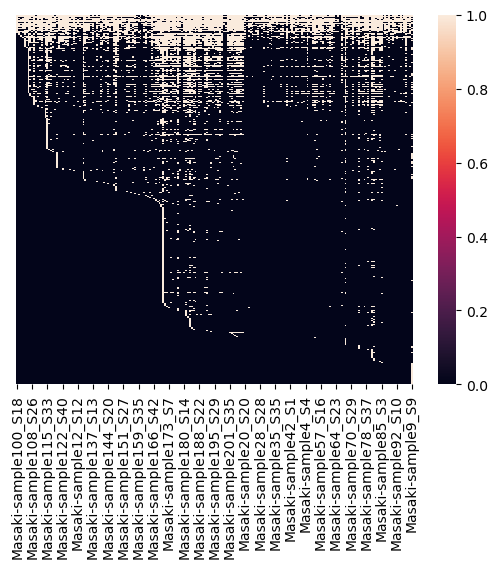

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

final_df


sns.heatmap(final_df,yticklabels=False)
plt.show()